<a href="https://www.kaggle.com/code/piyushchauhan8279/house-price-prediction-ipynb?scriptVersionId=208740593" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# MACHINE LEARNING LABSHEET 1 

**Q1: Load the data from the BostonHouse.CSV file and perform initial exploratory data analysis (EDA).**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [2]:
df=pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')

In [3]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


**Check for any missing values in the dataset.**

In [4]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
# Check the column names to identify the target variable
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [6]:
# Drop rows with missing values 
df = df.dropna()

In [7]:
# Display summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
             crim          zn       indus        chas         nox          rm  \
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean     3.647414   11.402196   11.160619    0.069860    0.555151    6.284341   
std      8.637688   23.414214    6.857123    0.255166    0.116186    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081990    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.693110   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean    68.513373    3.786423    9.596806  409.143713   18.453493  356.2

# Q2: Analyze and visualize the correlation between the features and the target variable (house prices).

**Calculate the correlation matrix using df.corr().**

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

**Visualize the correlation matrix using a heatmap.**

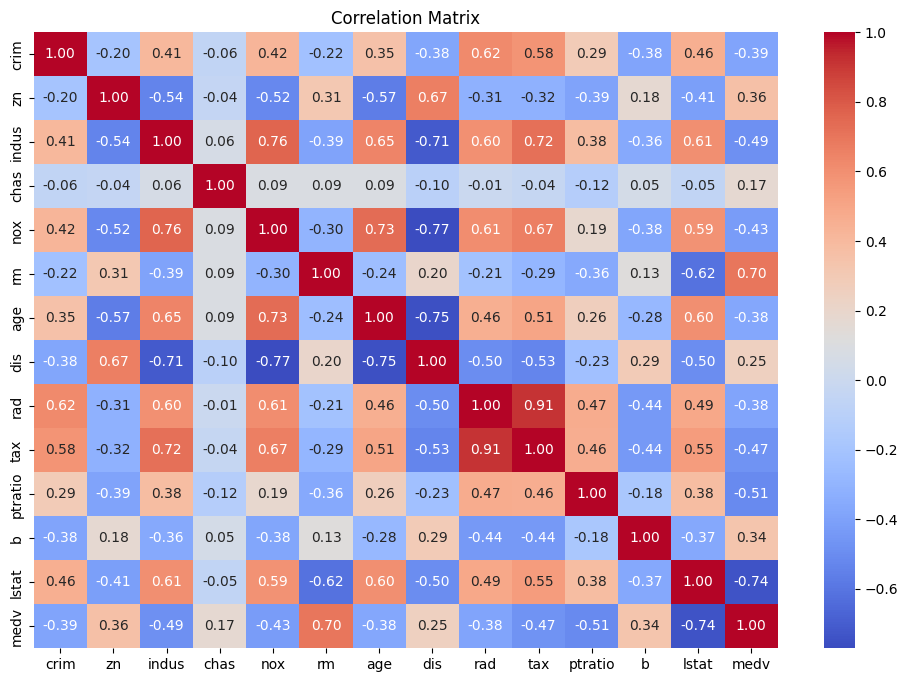

In [9]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Identify and list the features that have the highest positive and negative correlation with the target variable.**

In [10]:
# Set the target variable based on the actual column name
target_variable = df.columns[-1] 


In [11]:
# Identify features with highest positive and negative correlation with the target variable
high_positive_corr = correlation_matrix[target_variable].nlargest(6)
high_negative_corr = correlation_matrix[target_variable].nsmallest(5)

print("\nFeatures with highest positive correlation with", target_variable, ":")
print(high_positive_corr)

print("\nFeatures with highest negative correlation with", target_variable, ":")
print(high_negative_corr)


Features with highest positive correlation with medv :
medv    1.000000
rm      0.696169
zn      0.360031
b       0.335387
dis     0.251709
chas    0.174679
Name: medv, dtype: float64

Features with highest negative correlation with medv :
lstat     -0.737720
ptratio   -0.511897
indus     -0.486625
tax       -0.471253
nox       -0.428812
Name: medv, dtype: float64


# Q3: Prepare the data for training the Linear Regression model.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Select the features and the target variable**

In [13]:
# Select features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

**Split the dataset into training and testing sets using train_test_split from sklearn.model_selection.**

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardize the feature variables using StandardScaler from sklearn.preprocessing.**

In [15]:
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Q4: Train a Linear Regression model using the training data.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**Display the model's coefficients and intercept.**

In [18]:
# Display the model's coefficients and intercept
print("\nModel coefficients:")
print(model.coef_)
print("\nModel intercept:")
print(model.intercept_)


Model coefficients:
[-0.77069915  1.03071461  0.27913167  0.56447864 -1.68029622  2.82276603
  0.27220188 -2.88770879  2.54815414 -2.03833449 -1.89508943  1.13266888
 -4.2357555 ]

Model intercept:
22.90349999999999


# Q5: Evaluate the performance of the Linear Regression model using the testing data.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [20]:
# Predict house prices using the testing data
y_pred = model.predict(X_test_scaled)

**Calculate and display the performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) using mean_absolute_error and mean_squared_error from sklearn.metrics.**

In [21]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nPerformance Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Performance Metrics:
Mean Absolute Error (MAE): 3.2428569148107034
Mean Squared Error (MSE): 20.687720473048508
Root Mean Squared Error (RMSE): 4.548375586189921


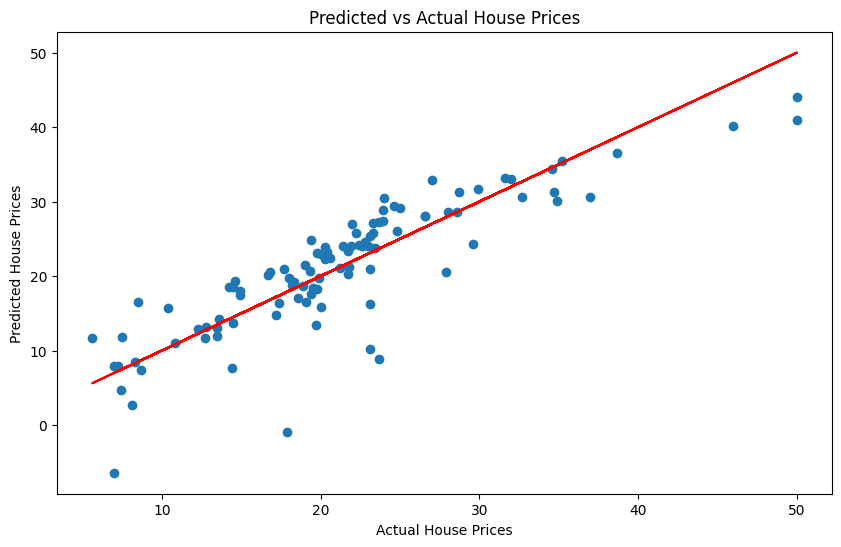

In [22]:
# Plot the predicted vs actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Diagonal line
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()